In [26]:
from molclustpy import *
from data_locator import *
import matplotlib.pyplot as plt
from Visualization.Molclustpy_visualization_funcitons import *
import pandas as pd
from input_file_extraction import *
from display_info import *

In [27]:
#search_directory = r'Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS'
search_directory = os.path.join('Examples','Nephrin-Nck-NWasp','Final_version_test_SIMULATIONS')
path_list = ['data', 'Cluster_stat', 'Histograms', 'Size_Freq_Fotm', 'MEAN_Run']

#In miliseconds (select None to get data for final time step)
time_ms = 265

_, split_file = read_input_file(search_directory)
dt_data = 1000*float(split_file[0][4][9:])

if time_ms != None:
    #Round to nearest available time based on dt_data value
    if time_ms % dt_data >= dt_data/2:
        time_ms = time_ms - (time_ms % dt_data) + dt_data
    else:
        time_ms = time_ms - (time_ms % dt_data)
    
    decimals = os.path.split(data_file_finder(search_directory, path_list, f'Size_Freq_Fotm.csv'))[1].split('_')[2].split('.')[1]

    time_s = format(float(time_ms/1000), f'.{len(decimals)}f')
    fotm_file = data_file_finder(search_directory, path_list, f'MEAN_Run_{time_s}_Size_Freq_Fotm.csv')
else:
    fotm_file = data_file_finder(search_directory, path_list, f'Size_Freq_Fotm.csv')
    time_ms = 1000*float(os.path.split(fotm_file)[1].split('_')[2])


In [28]:
outpath = os.path.normpath(fotm_file)
outpath = os.path.join(*outpath.split(os.sep)[:-5])

In [29]:
df = pd.read_csv(fotm_file) 
New_columns = ['Cluster size','frequency','foTM']
df.columns = New_columns
df.to_csv(os.path.join(outpath,'pyStat','SteadyState_distribution.csv'), index=False)

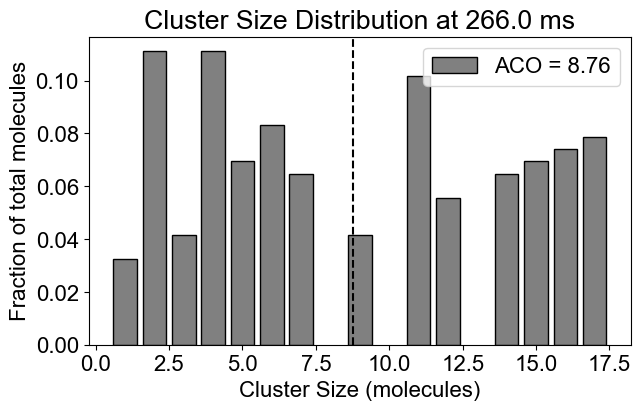

In [30]:
plotClusterDistCopy(outpath, time_ms, [])

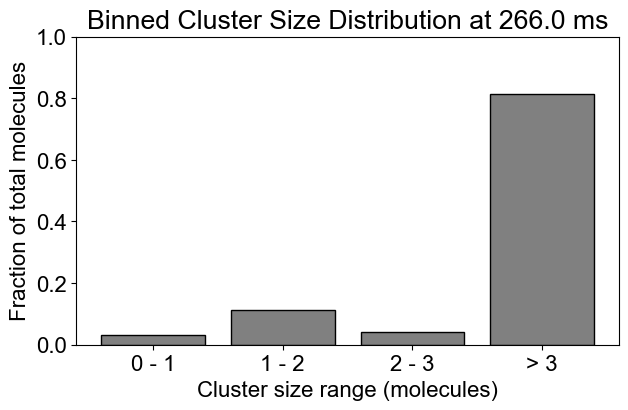

In [31]:
#Define bins by providing bin indicies
plotClusterDistCopy(outpath, time_ms, [0,1,2,3])